# Limpieza de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Esto nos sirve para visualizar como lo veriamos en Excel

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
DATA_ROOT = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition'
# DATA_ROOT = '.'

## Datos Faltantes

In [ ]:
## Nos dice que aqui el dato numero 2 de la serie es True al metodo .isnull, 
## esto quiere decir que su valor es una valor NaN(Not a number)

string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
# string_data.isnull()

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
## Cambiaremos el valor de aardvark a None(El objeto None de Python, denota falta de valor), 
## por ende al aplicarle el metodo .isnull, su valor se transforma en True

string_data[0] = None
string_data
# string_data.isnull()

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

### Filtrando datos faltantes

In [ ]:
## Importaremos nan del paquete de numpy, crea valores NaN
## De este modo hemos creado una serie nuevamente


from numpy import nan as NA
data = pd.Series([1, NA, 3.5, None, 7])
data
# data.dropna()

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
## El metodo .notnull(), filtra los datos que sean NaN y None

data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
## El metodo .dropna(), nos permite eliminar filas de un dataframe que tengan 
## valores NaN


data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data
# cleaned

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## El metodo .dropna() nos permite eliminar las filas, columnas que contienen valores
## NaN, asi mismo por sus parametros podemos definir si seran filas(0) o columnas(1)
## el parametro how = "any"(elimina cualquier fila que contenga almenos un valor NaN)
## el parametro how = "all"(elimina cualquier fila que contenga todos un valor NaN)



0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## Eliminamos columnas



0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
## Creamos un array con np.random.randn, una matriz de 7x3, que posteriormente convertiremos
## a un DataFrame, aplicaremos el dropna para eliminar los valores de las columnas


#df.dropna(thresh=2)

0         1         2
4  0.501453  1.362468 -0.558666
5  2.475932  1.358592 -1.604181
6 -0.166059  0.281318 -1.038202

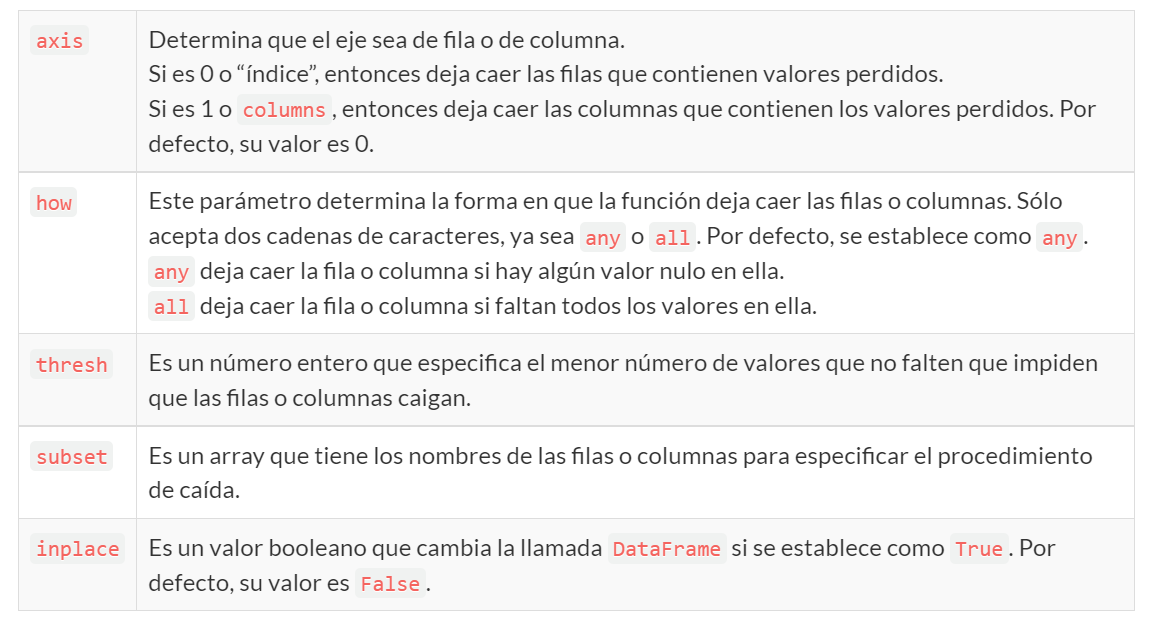

### Llenando datos faltantes

In [ ]:
## La función pandas.DataFrame.fillna() reemplaza los valores NaN en DataFrame con algún valor determinado.



0          1          2
0 -0.600226  43.566600  43.566600
1 -1.237642  43.566600  43.566600
2  0.857551  43.566600  -0.106765
3  1.113446  43.566600  -0.116420
4  1.131845  -1.328116   0.462108
5  1.573636   0.933083  -1.367736
6 -0.407443   0.696450  -0.228452

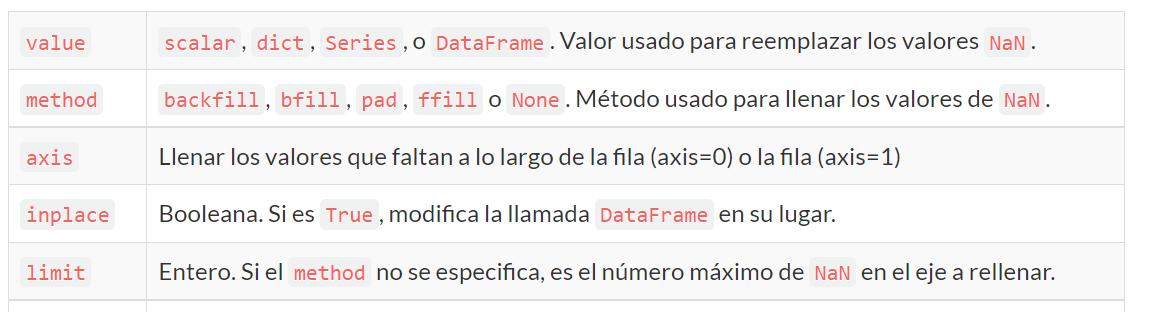

In [ ]:
## Podemos especificar a traves de un diccionario dentro del metodo fillna() valores
## especificos para cada columna, es decir aqui especificamos para la columna 1 un valor de 0.5
## para la columna 2 un valor de relleno de 0



0         1         2
0 -0.600226  0.000000  0.000000
1 -1.237642  0.000000  0.000000
2  0.857551  0.000000 -0.106765
3  1.113446  0.000000 -0.116420
4  1.131845 -1.328116  0.462108
5  1.573636  0.933083 -1.367736
6 -0.407443  0.696450 -0.228452

In [ ]:
## El parametro inplace , nos permite especificar un valor True o False, para decir si se hara el rellenado
## en el mismo dataframe, eliminando el dataframe anterior




0         1         2
0 -0.058662  0.000000  0.000000
1 -0.884957  0.000000  0.000000
2  1.514412  0.000000 -0.505644
3 -1.384888  0.000000 -1.844001
4  0.501453  1.362468 -0.558666
5  2.475932  1.358592 -1.604181
6 -0.166059  0.281318 -1.038202

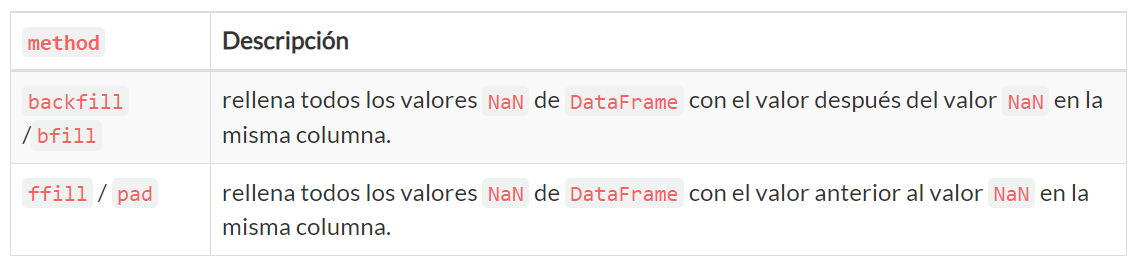

In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA


0         1         2
0  0.720852  1.243383 -0.663347
1  0.647051 -0.639362 -0.518857
2  1.117132 -0.639362 -0.991292
3  0.969584 -0.639362  0.480836
4 -0.097556       NaN  0.480836
5  1.599634       NaN  0.480836

In [ ]:
## En algunos casos va a ser necesario rellenar valores numericos, es adecuado hacerlo con la media,
## habra veces que sera necesario hacerlo con la mediana, pero depende de la distribucion de nuestros
## datos


data = pd.Series([1., NA, 3.5, NA, 7])
resultado_media = (1 + 3.5 + 7)/3
resultado_media
# data
# data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Datos Duplicados

### Quitando datos duplicados

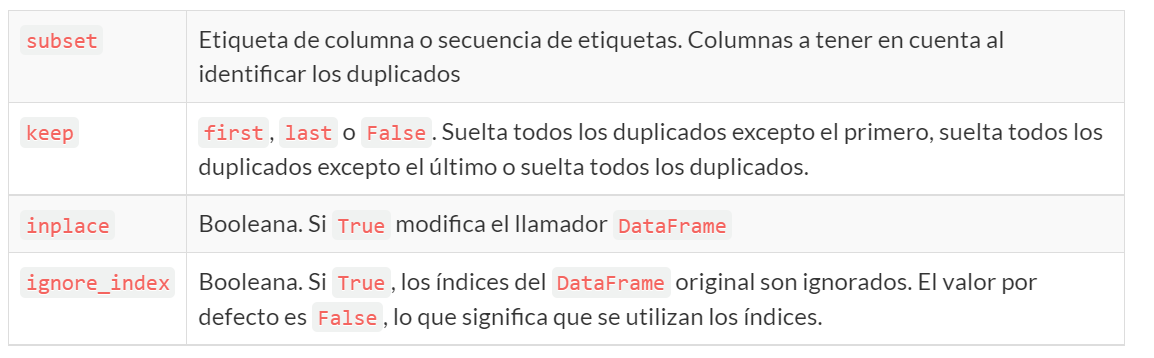

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4

In [ ]:
## El metodo .duplicated() nos retorna un True si es que dentro de nuestra data existen 
## valores que comparten en todas las columnas el mismo valor que en alguna otra fila

data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
## .drop_duplicates(), aplica lo mismo que drop_na, en este caso elimina los valores repetidos

data.drop_duplicates()

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4

In [ ]:
## Crearemos una nueva columna, v1, aqui, la columna tendra valores del 0 al 6,
## utilizaremos el drop_duplicates(['k1']), que nos esta especificando, en que 
## columna actuara el drop_duplicates

data['v1'] = range(7)
data
#data.drop_duplicates(['k1'])

k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
6  two   4   6

In [ ]:
fruit_list = [ ('Orange', 34, 'Yes' ,'ABC') ,
             ('Mango', 24, 'No','XYZ' ) ,
             ('banana', 14, 'No','ABC' ) ,
            ('Orange', 34, 'Yes' ,'ABC') ]

df = pd.DataFrame(fruit_list, 
                  columns = ['Name',
                             'Price',
                             'In_Stock',
                             'Supplier'])

print("DataFrame:")
print(df)

df_unique=df.drop_duplicates(subset ="Supplier",keep="last") 

print("DataFrame with Unique vales of Supplier Column:")
print(df_unique)

DataFrame:
     Name  Price In_Stock Supplier
0  Orange     34      Yes      ABC
1   Mango     24       No      XYZ
2  banana     14       No      ABC
3  Orange     34      Yes      ABC
DataFrame with Unique vales of Supplier Column:
     Name  Price In_Stock Supplier
1   Mango     24       No      XYZ
3  Orange     34      Yes      ABC


## Remplazar valores

### Transformando datos usando mapeo

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
## La funcion map buscara segun el diccionario, los valores que se asignaran a la columna
## en base a otra columna

lowercased = data['food'].str.lower()
print(lowercased)
data['animal'] = lowercased.map(meat_to_animal)
print(data['animal'])
data

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object
0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: animal, dtype: object


food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

### Metodo `.replace()`

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renombrar indices y columnas

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [ ]:
print(data)
data_renamed = data.rename(index=str.upper, columns=str.upper)
print(data_renamed)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
          ONE  TWO  THREE  FOUR
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [ ]:
data_renamed = data_renamed.rename(index=str.upper, columns=str.upper)

data_renamed.rename(index={'OHIO': 'INDIANA'},
            columns={'THREE': 'peekaboo'})

ONE  TWO  peekaboo  FOUR
INDIANA     0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

## Discretización y creación de variables categóricas

### Discretizacion y 'binning'

In [ ]:
## Binning: El agrupamiento de datos, también llamado agrupamiento discreto o agrupamiento, 
## es una técnica de preprocesamiento de datos que se utiliza para reducir los efectos de errores menores de observación.  


## Discretizacion: la discretización es el proceso de transferir funciones continuas, modelos, variables y ecuaciones a contrapartes discretas.​ 
##Este proceso generalmente se lleva a cabo como un primer paso para hacerlos adecuados para la evaluación numérica

ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
## El metodo cut de pandas, recibe age como la matriz que se va a categorizar,
## para este caso nuestro segundo parametro 'bins', establece los limites en que
## agrupara los datos

bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.12, 0.34], (0.76, 0.98], (0.12, 0.34], (0.34, 0.55], (0.55, 0.76], ..., (0.76, 0.98], (0.34, 0.55], (0.76, 0.98], (0.34, 0.55], (0.34, 0.55]]
Length: 20
Categories (4, interval[float64, right]): [(0.12, 0.34] < (0.34, 0.55] < (0.55, 0.76] <
                                           (0.76, 0.98]]

In [ ]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(-3.626, -0.626]    250
(-0.626, 0.0233]    250
(0.0233, 0.692]     250
(0.692, 3.644]      250
dtype: int64

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.0233, 1.233], (0.0233, 1.233], (-1.263, 0.0233], (-1.263, 0.0233], (-1.263, 0.0233], ..., (0.0233, 1.233], (0.0233, 1.233], (0.0233, 1.233], (-1.263, 0.0233], (-1.263, 0.0233]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.626, -1.263] < (-1.263, 0.0233] < (0.0233, 1.233] <
                                           (1.233, 3.644]]

In [ ]:
## Para entender mejor el Binning, utilizaremos un dataset de una URL

trab_url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT3FqAXtfU7BWmWK5mYHlAC90nuIWgP6abe9ktYwVu0ceXAeOrEk7rVFWRPcEnbhr6xhdbnsQJstEbS/pub?output=csv'
trab_data = pd.read_csv(trab_url)
print(trab_data.head(10))
trab_data.columns


   COD_UNIDAD                          UNIDAD  COD_SEDE  \
0           1              AGENCIA MERCADERES         1   
1           8                 AGENCIA JULIACA         8   
2           8                 AGENCIA JULIACA        39   
3          99                  ADMINISTRACIÓN        99   
4         348  AUDITORIA DE PROCESOS Y AGENCI        11   
5          55                 AGENCIA CHINCHA        55   
6         122           AGENCIA ICA PRINCIPAL       122   
7          19                   AGENCIA TUPAC        19   
8          80         AGENCIA ÓVALO VILCAPAZA        80   
9         210                  RECUPERACIONES        43   

                      SEDE  COD_DEPARTAMENTO              DEPARTAMENTO  \
0       AGENCIA MERCADERES                 1                   GENERAL   
1          AGENCIA JULIACA                 1                   GENERAL   
2     AGENCIA LAS MERCEDES                 1                   GENERAL   
3           ADMINISTRACION                 1          

Index(['COD_UNIDAD', 'UNIDAD', 'COD_SEDE', 'SEDE', 'COD_DEPARTAMENTO',
       'DEPARTAMENTO', 'COD_AREA', 'AREA', 'COD_SECCION', 'SECCION',
       'COD_TRABAJADOR', 'NOMBRES', 'DNI', 'SEXO', 'FECHA_NACIM', 'EDAD',
       'CORREO', 'COD_PLANILLA', 'PLANILLA', 'PUES_TRAB', 'FECHA_INGRESO',
       'FECHA_CESE', 'MOTIVO', 'SITUACION_TRABAJADOR'],
      dtype='object')

In [ ]:
trab_data['EDAD'].min() #Conocemos la edad minima
bins = np.arange(trab_data['EDAD'].min()-1,trab_data['EDAD'].max()+1,15) #Edad minima y maxima para los limites de los bins
print(bins)



names = ['Primer rango Etario 21-36', 'Segundo rango Etario 36-51','Tercer rango Etario 51-66'] #Establecemos las etiquetas

trab_data['Edad Cat'] = pd.cut(trab_data['EDAD'], bins, labels = names) # .cut para poder categorizar
trab_data



pd.value_counts(trab_data['Edad Cat'])




[21 36 51 66]


Segundo rango Etario 36-51    449
Tercer rango Etario 51-66     154
Primer rango Etario 21-36       4
Name: Edad Cat, dtype: int64

### Variables indicadoras/dummy

In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})

print(df)
pd.get_dummies(df['key'])

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0

In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(DATA_ROOT + '/datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller

In [ ]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [ ]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))

print(zero_matrix)
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Animation  Children's  Comedy  Adventure  Fantasy  Romance  Drama  \
0           0.0         0.0     0.0        0.0      0.0      0.0    0.0   
1           0.0         0.0     0.0        0.0      0.0      0.0    0.0   
2           0.0         0.0     0.0        0.0      0.0      0.0    0.0   
3           0.0         0.0     0.0        0.0      0.0      0.0    0.0   
4           0.0         0.0     0.0        0.0      0.0      0.0    0.0   
...         ...         ...     ...        ...      ...      ...    ...   
3878        0.0         0.0     0.0        0.0      0.0      0.0    0.0   
3879        0.0         0.0     0.0        0.0      0.0      0.0    0.0   
3880        0.0         0.0     0.0        0.0      0.0      0.0    0.0   
3881        0.0         0.0     0.0        0.0      0.0      0.0    0.0   
3882        0.0         0.0     0.0        0.0      0.0      0.0    0.0   

      Action  Crime  Thriller  Horror  Sci-Fi  Documentary  War  Musical  \
0        0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
1        0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
2        0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
3        0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
4        0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
...      ...    ...       ...     ...     ...          ...  ...      ...   
3878     0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
3879     0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
3880     0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
3881     0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   
3882     0.0    0.0       0.0     0.0     0.0          0.0  0.0      0.0   

      Mystery  Film-Noir  Western  
0         0.0        0.0      0.0  
1         0.0        0.0      0.0  
2         0.0        0.0      0.0  
3         0.0        0.0      0.0  
4         0.0        0.0      0.0  
...       ...        ...      ...  
3878      0.0        0.0      0.0  
3879      0.0        0.0      0.0  
3880      0.0        0.0      0.0  
3881      0.0        0.0      0.0  
3882      0.0        0.0      0.0  

[3883 rows x 18 columns]

In [ ]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [ ]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic

movie_id                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
3878      3948             Meet the Parents (2000)   
3879      3949          Requiem for a Dream (2000)   
3880      3950                    Tigerland (2000)   
3881      3951             Two Family House (2000)   
3882      3952               Contender, The (2000)   

                            genres  Genre_Animation  Genre_Children's  \
0      Animation|Children's|Comedy              1.0               1.0   
1     Adventure|Children's|Fantasy              0.0               1.0   
2                   Comedy|Romance              0.0               0.0   
3                     Comedy|Drama              0.0               0.0   
4                           Comedy              0.0               0.0   
...                            ...              ...               ...   
3878                        Comedy              0.0               0.0   
3879                         Drama              0.0               0.0   
3880                         Drama              0.0               0.0   
3881                         Drama              0.0               0.0   
3882                Drama|Thriller              0.0               0.0   

      Genre_Comedy  Genre_Adventure  Genre_Fantasy  Genre_Romance  \
0              1.0              0.0            0.0            0.0   
1              0.0              1.0            1.0            0.0   
2              1.0              0.0            0.0            1.0   
3              1.0              0.0            0.0            0.0   
4              1.0              0.0            0.0            0.0   
...            ...              ...            ...            ...   
3878           1.0              0.0            0.0            0.0   
3879           0.0              0.0            0.0            0.0   
3880           0.0              0.0            0.0            0.0   
3881           0.0              0.0            0.0            0.0   
3882           0.0              0.0            0.0            0.0   

      Genre_Drama  ...  Genre_Crime  Genre_Thriller  Genre_Horror  \
0             0.0  ...          0.0             0.0           0.0   
1             0.0  ...          0.0             0.0           0.0   
2             0.0  ...          0.0             0.0           0.0   
3             1.0  ...          0.0             0.0           0.0   
4             0.0  ...          0.0             0.0           0.0   
...           ...  ...          ...             ...           ...   
3878          0.0  ...          0.0             0.0           0.0   
3879          1.0  ...          0.0             0.0           0.0   
3880          1.0  ...          0.0             0.0           0.0   
3881          1.0  ...          0.0             0.0           0.0   
3882          1.0  ...          0.0             1.0           0.0   

      Genre_Sci-Fi  Genre_Documentary  Genre_War  Genre_Musical  \
0              0.0                0.0        0.0            0.0   
1              0.0                0.0        0.0            0.0   
2              0.0                0.0        0.0            0.0   
3              0.0                0.0        0.0            0.0   
4              0.0                0.0        0.0            0.0   
...            ...                ...        ...            ...   
3878           0.0                0.0        0.0            0.0   
3879           0.0                0.0        0.0            0.0   
3880           0.0                0.0        0.0            0.0   
3881           0.0                0.0        0.0            0.0   
3882           0.0                0.0        0.0            0.0   

      Genre_Myste

## Detectar y filtrar outliers

Un outlier, es un dato anomalo/excepcional dentro del rango de datos, es decir, que los outliers en nuestro dataset serán los valores que se escapan al rango en donde se concentran la mayoría de muestras

In [ ]:
#Descarguemos el dataset

info_rem = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQU1L40Q0MqSYT9oNCedB4JxlpsNL9ff5b3MtdxNcoo9h_dx4HSU7iVwiHctd_xOdC1RFcqf_o-ffr2/pub?output=csv')
info_rem

CARGO  EXPEDIENTE  \
0                                 ANALISTA DE CREDITOS  903 - 2021   
1                                 ANALISTA DE CREDITOS  903 - 2021   
2                                 ANALISTA DE CREDITOS  913 - 2021   
3                                 ANALISTA DE CREDITOS    921-2021   
4                                 ANALISTA DE CREDITOS    941-2021   
..                                                 ...         ...   
368                               ANALISTA DE CREDITOS  172 - 2022   
369                               ANALISTA DE CREDITOS         NaN   
370                               ANALISTA DE CREDITOS         NaN   
371                               ANALISTA DE CREDITOS         NaN   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         NaN   

    Lugar de Postulación (Convocatoria)  \
0                     ANTUNEZ DE MAYOLO   
1                     ANTUNEZ DE MAYOLO   
2                     ANTUNEZ DE MAYOLO   
3                                 TACNA   
4                     ANTUNEZ DE MAYOLO   
..                                  ...   
368                      ICA SAN MARTIN   
369                            LA OROYA   
370                            LA OROYA   
371                      CERRO DE PASCO   
372                            AREQUIPA   

                                 INDICACION DEL JURADO FECHA DE SELECCIÓN  \
0       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         02/12/2021   
1        ACCE AVANZADO EXPERTO – AG. ANTUNEZ DE MAYOLO         02/12/2021   
2       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         11/12/2021   
3                     AC AVANZADO SUPERIOR - AG. PINTO         16/12/2021   
4       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         15/12/2021   
..                                                 ...                ...   
368  ANALISTA DE CREDITOS EXPERTO - AG. ICA SAN MARTIN         09/03/2022   
369                                                NaN         10/03/2022   
370                                                NaN         10/03/2022   
371                                                NaN         11/01/2022   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         11/03/2022   

                            APELLIDOS Y NOMBRES         DNI  \
0               SARMIENTO MORALES, JORGE MANUEL  48126082.0   
1                   LOYOLA JORGE, MARISA ANGELA  70336326.0   
2                    PECEROS ZAVALA, RUTH PAOLA  45942433.0   
3                         Dante Rojas Huanacuni  41432183.0   
4                  URBANO IVARROLA, JOSE DANIEL  47691837.0   
..                                          ...         ...   
368  SALGADO DIAZ VDA. DE RAFFO, AURORA SUSANAO  21574610.0   
369                 Ruben Paul Basaldua Papuico  72858626.0   
370               Jovino Rosendo Contreras Soto  40852380.0   
371                Walter Orlando Zevallos Luis  71922476.0   
372               CALDAS CHIRINOS, RENZO ADRIAN  72672599.0   

                                 E-mail   Teléfonos DISTRITO/ DIRECCION  \
0                   jmsm_21@hotmail.com   987181405          LIMA NORTE   
1                    mari92lj@gmail.com   955705511          LIMA NORTE   
2                    pola3603@gmail.com  993085 362          LIMA NORTE   
3                   edrh_20@hotmail.com   952953290               TACNA   
4                d.urbano1404@gmail.com   997422069          LIMA NORTE   
..                                  ...         ...                 ...   
368           aurosalgado26@hotmail.com   945575364      ICA SAN MARTIN   
369  basalduapapuicorubenpaul@gmail.com   936060147            LA OROYA   
370               jovino_cs@hotmail.com   965333754            LA OROYA   
371               wzx_14_10@hotmail.com   925142158      CERRO DE PASCO   
372           renzo.caldas.ch@gmail.com   925185682            AREQUIPA   

    INTERNO/ EXTERNO Carta Oferta o felicitación FECHA DE INGRESO  \
0            EXTERNO                   

In [ ]:
info_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CARGO                                372 non-null    object 
 1   EXPEDIENTE                           356 non-null    object 
 2   Lugar de Postulación (Convocatoria)  373 non-null    object 
 3   INDICACION DEL JURADO                367 non-null    object 
 4   FECHA DE SELECCIÓN                   372 non-null    object 
 5   APELLIDOS Y NOMBRES                  372 non-null    object 
 6   DNI                                  371 non-null    float64
 7   E-mail                               372 non-null    object 
 8   Teléfonos                            372 non-null    object 
 9   DISTRITO/ DIRECCION                  372 non-null    object 
 10  INTERNO/ EXTERNO                     366 non-null    object 
 11  Carta Oferta o felicitación     

In [ ]:
#Para este caso utilizaremos solo la columna REMUNERACION, para detectar algun outlier
info_rem['REMUNERACIÓN'].astype(float)

ValueError: ignored

In [ ]:
#Vemos que existen datos que tienen la palabra 'RESERVA'
#Veremos todos los datos que son diferentes a un tipo float o int, para este caso
#nos centraremos en la columna remuneracion

info_rem_filter = info_rem[info_rem['REMUNERACIÓN'] != 'RESERVA'] ##Creamos nuestro filtro
info_rem_filter


CARGO  EXPEDIENTE  \
0                                 ANALISTA DE CREDITOS  903 - 2021   
1                                 ANALISTA DE CREDITOS  903 - 2021   
2                                 ANALISTA DE CREDITOS  913 - 2021   
3                                 ANALISTA DE CREDITOS    921-2021   
4                                 ANALISTA DE CREDITOS    941-2021   
..                                                 ...         ...   
368                               ANALISTA DE CREDITOS  172 - 2022   
369                               ANALISTA DE CREDITOS         NaN   
370                               ANALISTA DE CREDITOS         NaN   
371                               ANALISTA DE CREDITOS         NaN   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         NaN   

    Lugar de Postulación (Convocatoria)  \
0                     ANTUNEZ DE MAYOLO   
1                     ANTUNEZ DE MAYOLO   
2                     ANTUNEZ DE MAYOLO   
3                                 TACNA   
4                     ANTUNEZ DE MAYOLO   
..                                  ...   
368                      ICA SAN MARTIN   
369                            LA OROYA   
370                            LA OROYA   
371                      CERRO DE PASCO   
372                            AREQUIPA   

                                 INDICACION DEL JURADO FECHA DE SELECCIÓN  \
0       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         02/12/2021   
1        ACCE AVANZADO EXPERTO – AG. ANTUNEZ DE MAYOLO         02/12/2021   
2       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         11/12/2021   
3                     AC AVANZADO SUPERIOR - AG. PINTO         16/12/2021   
4       ACCE AVANZADO SUPERIOR - AG. ANTUNEZ DE MAYOLO         15/12/2021   
..                                                 ...                ...   
368  ANALISTA DE CREDITOS EXPERTO - AG. ICA SAN MARTIN         09/03/2022   
369                                                NaN         10/03/2022   
370                                                NaN         10/03/2022   
371                                                NaN         11/01/2022   
372  PRACTICANTE PRE- PROFESIONAL DE INFRAESTRUCTUA...         11/03/2022   

                            APELLIDOS Y NOMBRES         DNI  \
0               SARMIENTO MORALES, JORGE MANUEL  48126082.0   
1                   LOYOLA JORGE, MARISA ANGELA  70336326.0   
2                    PECEROS ZAVALA, RUTH PAOLA  45942433.0   
3                         Dante Rojas Huanacuni  41432183.0   
4                  URBANO IVARROLA, JOSE DANIEL  47691837.0   
..                                          ...         ...   
368  SALGADO DIAZ VDA. DE RAFFO, AURORA SUSANAO  21574610.0   
369                 Ruben Paul Basaldua Papuico  72858626.0   
370               Jovino Rosendo Contreras Soto  40852380.0   
371                Walter Orlando Zevallos Luis  71922476.0   
372               CALDAS CHIRINOS, RENZO ADRIAN  72672599.0   

                                 E-mail   Teléfonos DISTRITO/ DIRECCION  \
0                   jmsm_21@hotmail.com   987181405          LIMA NORTE   
1                    mari92lj@gmail.com   955705511          LIMA NORTE   
2                    pola3603@gmail.com  993085 362          LIMA NORTE   
3                   edrh_20@hotmail.com   952953290               TACNA   
4                d.urbano1404@gmail.com   997422069          LIMA NORTE   
..                                  ...         ...                 ...   
368           aurosalgado26@hotmail.com   945575364      ICA SAN MARTIN   
369  basalduapapuicorubenpaul@gmail.com   936060147            LA OROYA   
370               jovino_cs@hotmail.com   965333754            LA OROYA   
371               wzx_14_10@hotmail.com   925142158      CERRO DE PASCO   
372           renzo.caldas.ch@gmail.com   925185682            AREQUIPA   

    INTERNO/ EXTERNO Carta Oferta o felicitación FECHA DE INGRESO  \
0            EXTERNO                   

In [ ]:
info_rem_filter.dropna(inplace=True)
info_rem_filter['REMUNERACIÓN'].astype(int)
#Aqui obtuvimos la columna con valores que ya son float64


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0      2000
1      1700
2      2000
3      2000
4      2000
       ... 
362    1700
365    1400
366    5500
367    1400
368    2400
Name: REMUNERACIÓN, Length: 265, dtype: int64

In [ ]:
info_rem_filter2 = info_rem_filter[info_rem_filter['REMUNERACIÓN'] != 'NaN']

info_rem_filter2['REMUNERACIÓN'].value_counts()

930      67
1400     55
1700     39
2000     38
2400     36
2900     14
3500      3
1100      3
4000      2
6500      1
1800      1
3000      1
1300      1
29000     1
20000     1
1500      1
5500      1
Name: REMUNERACIÓN, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7fe384da3ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe384dadb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe384db5b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe384db5650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe384dad0d0>,
  <matplotlib.lines.Line2D at 0x7fe384dad610>]}

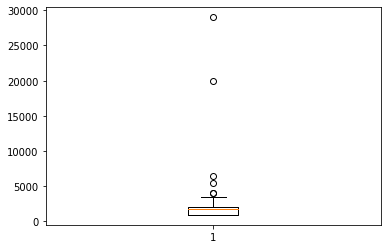

In [ ]:
#Realizaremos un boxplot, este es un grafico que nos permite observar anomalias, para esto
#importaremos la libreria matplotlib


import matplotlib.pyplot as plt

%matplotlib inline

plt.boxplot(info_rem_filter2['REMUNERACIÓN'].astype(float)) #Convertiremos la columna a tipo float

##Observamos que existen 5 valores que serian considerados outliers.

In [ ]:
## Debajo del borde inferios
print(info_rem_filter2['REMUNERACIÓN'].astype(float).mean()) 
print(info_rem_filter2['REMUNERACIÓN'].astype(float).describe()) 
## Raya naranja es la media(MEAN)

1883.0566037735848
count      265.000000
mean      1883.056604
std       2147.897337
min        930.000000
25%        930.000000
50%       1700.000000
75%       2000.000000
max      29000.000000
Name: REMUNERACIÓN, dtype: float64


In [ ]:
##Crearemos nuestro IQR(Interquartile Range), pues nos permite conocer los outliers de la columna Remuneracion
IQR = info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75)-info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25)
IQR

1070.0

In [ ]:
#El bigote inferior esta denotado, por el quartile 25% - 1.5 IQR
#El bigote superior esta denotado, por el quartile 75% + 1.5 IQR
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75))
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25))
print("Mi rango superior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.75) + 1.5*IQR)
print("Mi rango inferior es: ", info_rem_filter2['REMUNERACIÓN'].astype(float).quantile(0.25) - 1.5*IQR)



Mi rango superior es:  2000.0
Mi rango superior es:  930.0
Mi rango superior es:  3605.0
Mi rango inferior es:  -675.0


In [ ]:
## Ahora descubriremos cuales son los registros con outliers

info_rem_filter3 = info_rem_filter2[info_rem_filter2['REMUNERACIÓN'].astype(float) > 3605]
info_rem_filter3

CARGO  EXPEDIENTE  \
12                            GERENTE DE AGENCIA JAÉN    956-2021   
26                     SENIOR BUSINESS ANALYTICS ACOE  970 - 2021   
107       ANALISTA SENIOR DE INTELIGENCIA DE COBRANZA  974 - 2021   
164                              ANALISTA DE CREDITOS  013 - 2022   
167                              ANALISTA DE CREDITOS  063 - 2022   
366  ANALISTA SENIOR VALIDACION Y SEGUIMIENTO MODELOS    168-2022   

    Lugar de Postulación (Convocatoria)  \
12                                 JAÉN   
26                                 LIMA   
107                     AREQUIPA - LIMA   
164               SAN MARTIN DE PORRRES   
167                REGION LIMA II - ICA   
366                                LIMA   

                                INDICACION DEL JURADO FECHA DE SELECCIÓN  \
12                          GERENTE DE AGENCIA - JAÉN         24/12/2021   
26                     SENIOR BUSINESS ANALYTICS ACOE         27/12/2021   
107       ANALISTA SENIOR DE INTELIGENCIA DE COBRANZA         11/01/2022   
164           ACCE SUPERIOR - AG SAN MARTIN DE PORRES         03/01/2022   
167                ACCE AVANZADO SUPERIOR - CHORILLOS         31/01/2022   
366  ANALISTA SENIOR VALIDACION Y SEGUIMIENTO MODELOS         23/02/2022   

              APELLIDOS Y NOMBRES         DNI                        E-mail  \
12           SANDRO PONCE SALAZAR  44409786.0  sandroponce_0908@hotmail.com   
26   CACERES SANCHEZ, JUAN CARLOS  43875803.0          jcacerez06@gmail.com   
107    CUMPA MONTALVO, NESTOR ELI  40326137.0        petitami2798@gmail.com   
164         GUEVARA NIETO, JERSON  77236386.0        jers_gn_22@hotmail.com   
167   MOLLÁN BRIONES, DORIS NOEMÍ  47707742.0           dorismb60@gmail.com   
366        LETO HUAYANCA, CLAUDIA  42777625.0       claudialeto25@gmail.com   

       Teléfonos                                DISTRITO/ DIRECCION  \
12     930313837                          Calle Diego Palomino 1997   
26     926922851                                               LIMA   
107  986005051 -  Calle Misionero Vega 371- Dpto. 402 Santa Rosa...   
164    941334794                               SAN MARTIN DE PORRES   
167  960 891 854                                         CHORRILLOS   
366    979765672                                               LIMA   

    INTERNO/ EXTERNO Carta Oferta o felicitación FECHA DE INGRESO  \
12           EXTERNO                      APLICA       03/01/2022   
26           EXTERNO                      APLICA       10/01/2022   
107          EXTERNO                      APLICA       07/02/2022   
164          EXTERNO                      APLICA         DESISTIO   
167          EXTERNO                      APLICA         DESISTIO   
366          EXTERNO                      APLICA       28/03/2022   

    MODALIDAD (HIBRIDO/ PRESENCIAL) REMUNERACIÓN  
12                       PRESENCIAL         6500  
26                          HIBRIDO         4000  
107                         HIBRIDO         4000  
164                      PRESENCIAL        29000  
167                      PRESENCIAL        20000  
366                         HIBRIDO         5500